# Implementation

This section demonstrates how to fit regression and decision trees with `scikit-learn`. We will again use the {doc}`tips </content/appendix/data>` dataset for the regression tree and the {doc}`penguins </content/appendix/data>` dataset for the classification tree.

In [1]:
## Import packages
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## 1. Regression Tree

Let's start by loading in the data. We'll keep things as `pandas` dataframes rather than `numpy` arrays now.

In [2]:
## Load tips data
tips = sns.load_dataset('tips')
X = tips.drop(columns = 'tip')
y = tips['tip']

## Train-test split
np.random.seed(1)
test_frac = 0.25
test_size = int(len(y)*test_frac)
test_idxs = np.random.choice(np.arange(len(y)), test_size, replace = False)
X_train = X.drop(test_idxs)
y_train = y.drop(test_idxs)
X_test = X.loc[test_idxs]
y_test = y.loc[test_idxs]

We can then fit the regression tree with the `DecisionTreeRegressor` class. Unfortunately, `scikit-learn` does not currently support categorical predictors. Instead, we have to first convert these predictors to dummy variables. Note that this implies that splits of categorical variables can only separate one value from the rest. For instance, a variable with discrete values $a, b, c,$ and $d$ could not be split as $\{a, b\}$ versus $\{c, d\}$. 

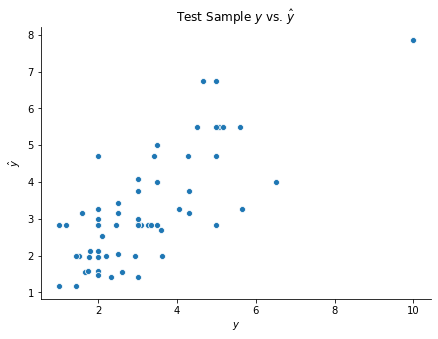

In [3]:
from sklearn.tree import DecisionTreeRegressor

## Get dummies
X_train = pd.get_dummies(X_train, drop_first = True)
X_test = pd.get_dummies(X_test, drop_first = True)

## Build model
dtr = DecisionTreeRegressor(max_depth = 7, min_samples_split = 5)
dtr.fit(X_train, y_train)
y_test_hat = dtr.predict(X_test)

## Visualize predictions
fig, ax = plt.subplots(figsize = (7, 5))
sns.scatterplot(y_test, y_test_hat)
ax.set(xlabel = r'$y$', ylabel = r'$\hat{y}$', title = r'Test Sample $y$ vs. $\hat{y}$')
sns.despine()

## 2. Classification Tree

The classification tree implementation in `scikit-learn` is nearly identical. The corresponding code is provided below. 

In [4]:
## Load penguins data
penguins = sns.load_dataset('penguins')
penguins = penguins.dropna().reset_index(drop = True)
X = penguins.drop(columns = 'species')
y = penguins['species']

## Train-test split
np.random.seed(1)
test_frac = 0.25
test_size = int(len(y)*test_frac)
test_idxs = np.random.choice(np.arange(len(y)), test_size, replace = False)
X_train = X.drop(test_idxs)
y_train = y.drop(test_idxs)
X_test = X.loc[test_idxs]
y_test = y.loc[test_idxs]

In [5]:
from sklearn.tree import DecisionTreeClassifier

## Get dummies
X_train = pd.get_dummies(X_train, drop_first = True)
X_test = pd.get_dummies(X_test, drop_first = True)

## Build model
dtc = DecisionTreeClassifier(max_depth = 10, min_samples_split = 10)
dtc.fit(X_train, y_train)
y_test_hat = dtc.predict(X_test)

## Observe Accuracy
np.mean(y_test_hat == y_test)

0.9036144578313253